In [150]:
%%time
import os
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import glob 
import openpyxl 

CPU times: total: 0 ns
Wall time: 0 ns


In [163]:
%%time
mega = pd.read_excel("Mega-Sena.xlsx")

CPU times: total: 1.05 s
Wall time: 1.06 s


In [168]:
mega.dtypes

Concurso                                       int64
Data do Sorteio                               object
Bola1                                          int64
Bola2                                          int64
0                                              int64
Bola4                                          int64
Bola5                                          int64
Bola6                                          int64
Ganhadores 6 acertos                           int64
Cidade / UF                                   object
Rateio 6 acertos                             float64
Ganhadores 5 acertos                           int64
Rateio 5 acertos                             float64
Ganhadores 4 acertos                           int64
Rateio 4 acertos                             float64
Acumulado 6 acertos                          float64
Arrecadação Total                            float64
Estimativa prêmio                            float64
Acumulado Sorteio Especial Mega da Virada    f

In [165]:
mega[['Rateio 6 acertos','Rateio 5 acertos','Rateio 4 acertos','Acumulado 6 acertos',
      'Arrecadação Total','Estimativa prêmio','Acumulado Sorteio Especial Mega da Virada']].head()

,Rateio 6 acertos,Rateio 5 acertos,Rateio 4 acertos,Acumulado 6 acertos,Arrecadação Total,Estimativa prêmio,Acumulado Sorteio Especial Mega da Virada
0,"R$0,00","R$39.158,92","R$330,21","R$1.714.650,23","R$0,00","R$0,00","R$0,00"
1,"R$2.307.162,23","R$14.424,02","R$208,91","R$0,00","R$0,00","R$0,00","R$0,00"
2,"R$391.192,51","R$10.515,93","R$153,01","R$0,00","R$0,00","R$0,00","R$0,00"
3,"R$0,00","R$15.322,24","R$180,48","R$717.080,75","R$0,00","R$0,00","R$0,00"
4,"R$0,00","R$5.318,10","R$96,53","R$1.342.488,85","R$0,00","R$0,00","R$0,00"


In [166]:
lista = ['Rateio 6 acertos','Rateio 5 acertos','Rateio 4 acertos','Acumulado 6 acertos',
      'Arrecadação Total','Estimativa prêmio','Acumulado Sorteio Especial Mega da Virada']
      
for id in lista:
    mega[id] = mega[id].map( lambda x: x.lstrip('R$') )
    mega[id] = mega[id].str.replace('.', '')
    mega[id] = mega[id].str.replace(',', '.')
    mega[id] = mega[id].astype(float)

C:\Users\patrick.franco\AppData\Local\Temp\ipykernel_10304\1400610911.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  mega[id] = mega[id].str.replace('.', '')


In [169]:
mega['Data do Sorteio'] = pd.to_datetime(mega['Data do Sorteio'], infer_datetime_format=True)
mega['Ano'] = mega['Data do Sorteio'].dt.year
mega['Mes'] = mega['Data do Sorteio'].dt.month

C:\Users\patrick.franco\AppData\Local\Temp\ipykernel_10304\3433565119.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mega['Data do Sorteio'] = pd.to_datetime(mega['Data do Sorteio'], infer_datetime_format=True)


In [103]:
mega[['Data do Sorteio','Ano']].groupby('Ano').count()

,Data do Sorteio
Ano,
1996,43
1997,52
1998,53
1999,52
2000,52
2001,73
2002,100
2003,100
2004,102


In [104]:
#facil[['Cidade / UF','Ano']].tail()
#%%time

mega.filter(regex='Concurso|Data|Bola', axis=1).tail()

,Concurso,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6
2760,2762,2024-08-15,1,17,30,40,48,50
2761,2764,2024-08-20,20,31,34,38,42,51
2762,2765,2024-08-22,8,12,34,39,43,47
2763,2766,2024-08-24,9,10,34,36,38,44
2764,2767,2024-08-27,14,21,42,47,50,59


In [105]:
mega = mega[( mega['Ano']>=2019) ].copy() 

In [106]:
mega.rename(columns={'Ganhadores 6 acertos':'ganhdores6',
                     'Ganhadores 5 acertos':'ganhdores5',
                     'Ganhadores 4 acertos':'ganhdores4',
                     'Rateio 6 acertos':'rateio6',
                     'Rateio 5 acertos':'rateio5',
                     'Rateio 4 acertos':'rateio4',
                     'Acumulado 6 acertos':'acumulado6',
                     'Arrecadação Total':'arrecadacao',
                     'Estimativa prêmio':'estimativa',
                     'Acumulado Sorteio Especial Mega da Virada':'acumulado_especial'},inplace=True)

mega.drop(columns=['Observação'],axis=1,inplace=True)

In [107]:
mega['CANAL_ELETRONICO'] = mega['Cidade / UF'].str.contains('CANAL ELETRONICO', na=False)

mega['UF_MG'] = mega['Cidade / UF'].str.contains('/MG', na=False)
mega['UF_RJ'] = mega['Cidade / UF'].str.contains('/RJ', na=False)
mega['UF_SP'] = mega['Cidade / UF'].str.contains('/SP', na=False)
mega['UF_ES'] = mega['Cidade / UF'].str.contains('/ES', na=False)

mega['UF_DF'] = mega['Cidade / UF'].str.contains('/DF', na=False)
mega['UF_GO'] = mega['Cidade / UF'].str.contains('/GO', na=False)
mega['UF_MT'] = mega['Cidade / UF'].str.contains('/MT', na=False)
mega['UF_MS'] = mega['Cidade / UF'].str.contains('/MS', na=False)

mega['UF_RS'] = mega['Cidade / UF'].str.contains('/RS', na=False)
mega['UF_SC'] = mega['Cidade / UF'].str.contains('/SC', na=False)
mega['UF_PR'] = mega['Cidade / UF'].str.contains('/PR', na=False)

mega['UF_PB'] = mega['Cidade / UF'].str.contains('/PB', na=False)
mega['UF_BA'] = mega['Cidade / UF'].str.contains('/BA', na=False)
mega['UF_RN'] = mega['Cidade / UF'].str.contains('/RN', na=False)
mega['UF_PE'] = mega['Cidade / UF'].str.contains('/PE', na=False)
mega['UF_MA'] = mega['Cidade / UF'].str.contains('/MA', na=False)
mega['UF_SE'] = mega['Cidade / UF'].str.contains('/SE', na=False)
mega['UF_CE'] = mega['Cidade / UF'].str.contains('/CE', na=False)

mega['UF_AM'] = mega['Cidade / UF'].str.contains('/AM', na=False)
mega['UF_RR'] = mega['Cidade / UF'].str.contains('/RR', na=False)
mega['UF_PA'] = mega['Cidade / UF'].str.contains('/PA', na=False)


In [109]:
mega[['Cidade / UF','Ano']].tail()


,Cidade / UF,Ano
2760,NaN,2024
2761,VARZEA PAULISTA/SP,2024
2762,NaN,2024
2763,CANAL ELETRONICO; RIO DE JANEIRO/RJ,2024
2764,NaN,2024


In [110]:
mega.shape

In [111]:
mega.dtypes

Concurso                       int64
Data do Sorteio       datetime64[ns]
Bola1                          int64
Bola2                          int64
Bola3                          int64
Bola4                          int64
Bola5                          int64
Bola6                          int64
ganhdores6                     int64
Cidade / UF                   object
rateio6                       object
ganhdores5                     int64
rateio5                       object
ganhdores4                     int64
rateio4                       object
acumulado6                    object
Arrecadação Total             object
Estimativa prêmio             object
acumulado_especial            object
Ano                            int64
Mes                            int64
CANAL_ELETRONICO                bool
UF_MG                           bool
UF_RJ                           bool
UF_SP                           bool
UF_ES                           bool
UF_DF                           bool
U

In [42]:
colunas = ['Data Sorteio','Concurso','Bola1','Bola2','Bola3','Bola4','Bola5','Bola6','Bola7',
           'Bola8','Bola9','Bola10','Bola11','Bola12','Bola13','Bola14','Bola15']

In [43]:
colunas

['Data Sorteio',
 'Concurso',
 'Bola1',
 'Bola2',
 'Bola3',
 'Bola4',
 'Bola5',
 'Bola6',
 'Bola7',
 'Bola8',
 'Bola9',
 'Bola10',
 'Bola11',
 'Bola12',
 'Bola13',
 'Bola14',
 'Bola15']

In [44]:
facil2[colunas].head()

,Data Sorteio,Concurso,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,Bola9,Bola10,Bola11,Bola12,Bola13,Bola14,Bola15
1910,2020-01-03,1911,1,2,4,5,8,11,12,13,14,15,19,21,22,24,25
1911,2020-01-06,1912,2,5,6,7,8,9,10,14,16,18,20,21,22,23,24
1912,2020-01-08,1913,2,5,6,7,8,9,10,11,12,14,16,19,20,24,25
1913,2020-01-10,1914,2,4,5,8,10,12,13,14,15,17,18,19,20,21,25
1914,2020-01-13,1915,2,4,8,10,11,12,13,15,16,17,19,20,21,22,25


In [45]:
print(facil.shape , facil2.shape)


(2899, 35) (989, 56)


In [46]:
for bolas in range(1,17):
    print('Bola{0}'.format(bolas))

Bola1
Bola2
Bola3
Bola4
Bola5
Bola6
Bola7
Bola8
Bola9
Bola10
Bola11
Bola12
Bola13
Bola14
Bola15
Bola16


In [47]:
facil2[['Concurso','Bola4']].groupby('Bola4').count().sort_values(by='Concurso',ascending=False).head()

,Concurso
Bola4,
6,221
7,209
5,180
8,128
4,106


In [48]:
lista = []
for bolas in range(1,16):
    ele = facil2[['Concurso','Bola{0}'.format(bolas)]].groupby('Bola{0}'.format(bolas)
    ).count()
    ele.sort_values(by='Concurso',ascending=False,inplace=True)
    ele.reset_index(inplace=True)
    ele.rename(columns={'Bola{0}'.format(bolas):'Bola','Concurso':'Freq'},inplace=True)
    lista.append(ele.head(1))


In [49]:
#freq = pd.DataFrame(lista)
#df = lista[0].append(lista[0], ignore_index = True)

In [50]:
df = pd.concat(lista)

In [51]:
df[['Bola','Freq']].groupby('Bola').sum()

,Freq
Bola,
1,572
2,331
5,259
6,221
8,217
10,205
11,189
13,178
15,180


In [52]:
lista = []
for bolas in range(1,16):
    ele = facil2[['Concurso','Bola{0}'.format(bolas)]][
        facil2['Bola{0}'.format(bolas)].isin(~df.Bola.unique())].groupby('Bola{0}'.format(bolas)
    ).count()
    ele.sort_values(by='Concurso',ascending=False,inplace=True)
    ele.reset_index(inplace=True)
    ele.rename(columns={'Bola{0}'.format(bolas):'Bola','Concurso':'Freq'},inplace=True)
    lista.append(ele.head(1))

In [53]:
#facil2[['Concurso','Bola4']][facil2['Bola4'].isin(~df.Bola.unique())].groupby('Bola4').count().sort_values(by='Concurso',ascending=False).head()

In [54]:
df.Bola.unique()

array([ 1,  2,  5,  6,  8, 10, 11, 13, 15, 16, 18, 20, 22, 24, 25],
      dtype=int64)

In [55]:
df2 = pd.concat(lista)

In [56]:
df2.reset_index().head(33)

,index,Bola,Freq


In [57]:
# use glob to get all the csv files 
# in the folder 
path = os.getcwd() 
csv_files = glob.glob(os.path.join(path, "hebcal_*.csv")) 
  
frame_de_dados = []
# loop over the list of csv files 
for f in csv_files:    
    # read the csv file 
    df = pd.read_csv(f)[['Subject','Start Date']]

    # print the location and filename 
    print('Location:', f) 
    print('File Name:', f.split("\\")[-1]) 

    frame_de_dados.append(df)

Location: c:\Users\patrick.franco\Documents\GitHub\pibmunic\Loteria\hebcal_5776h_usa.csv
File Name: hebcal_5776h_usa.csv
Location: c:\Users\patrick.franco\Documents\GitHub\pibmunic\Loteria\hebcal_5777h_usa.csv
File Name: hebcal_5777h_usa.csv
Location: c:\Users\patrick.franco\Documents\GitHub\pibmunic\Loteria\hebcal_5778h_usa.csv
File Name: hebcal_5778h_usa.csv
Location: c:\Users\patrick.franco\Documents\GitHub\pibmunic\Loteria\hebcal_5779h_usa.csv
File Name: hebcal_5779h_usa.csv
Location: c:\Users\patrick.franco\Documents\GitHub\pibmunic\Loteria\hebcal_5780h_usa.csv
File Name: hebcal_5780h_usa.csv
Location: c:\Users\patrick.franco\Documents\GitHub\pibmunic\Loteria\hebcal_5781h_usa.csv
File Name: hebcal_5781h_usa.csv
Location: c:\Users\patrick.franco\Documents\GitHub\pibmunic\Loteria\hebcal_5782h_usa.csv
File Name: hebcal_5782h_usa.csv
Location: c:\Users\patrick.franco\Documents\GitHub\pibmunic\Loteria\hebcal_5783h_usa.csv
File Name: hebcal_5783h_usa.csv
Location: c:\Users\patrick.franc

In [58]:
#df = pd.read_csv('hebcal_5784h_usa.csv')[['Subject','Start Date']]

In [59]:
frame_de_dados[1].head()

,Subject,Start Date
0,Parashat Vayeilech,10/8/2016
1,Parashat Ha’azinu,10/15/2016
2,Parashat Bereshit,10/29/2016
3,Parashat Noach,11/5/2016
4,Parashat Lech-Lecha,11/12/2016


In [60]:
%%time
df = pd.concat(frame_de_dados)

CPU times: total: 0 ns
Wall time: 997 µs


In [80]:
df['Start Date'] = pd.to_datetime(df['Start Date'], infer_datetime_format=True)
df['Ano'] = df['Start Date'].dt.year
df['Mes'] = df['Start Date'].dt.month

In [81]:
df.head()

,Subject,Start Date,Ano,Mes
0,Parashat Vayeilech,2015-09-19,2015,9
1,Parashat Ha’azinu,2015-09-26,2015,9
2,Parashat Bereshit,2015-10-10,2015,10
3,Parashat Noach,2015-10-17,2015,10
4,Parashat Lech-Lecha,2015-10-24,2015,10


In [82]:
df.shape

In [83]:
#facil2[colunas].head()
df.dtypes

Subject               object
Start Date    datetime64[ns]
Ano                    int64
Mes                    int64
dtype: object

In [84]:
#https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html

In [85]:
import sympy
sympy.init_printing()

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)

In [73]:
f = sympy.exp(-a*t)
f

In [74]:
sympy.integrate(f*sympy.exp(-s*t), (t, 0, sympy.oo))


⎧       1                         π
⎪   ─────────      for │arg(s)│ ≤ ─
⎪     ⎛a    ⎞                     2
⎪   s⋅⎜─ + 1⎟                      
⎪     ⎝s    ⎠                      
⎪                                  
⎨∞                                 
⎪⌠                                 
⎪⎮  -a⋅t  -s⋅t                     
⎪⎮ ℯ    ⋅ℯ     dt     otherwise    
⎪⌡                                 
⎪0                                 
⎩                                  

In [75]:
sympy.laplace_transform(f, t, s)


⎛  1            ⎞
⎜─────, -a, True⎟
⎝a + s          ⎠

In [76]:
F = sympy.laplace_transform(f, t, s, noconds=True)
F

In [77]:
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)
invL(F)

In [78]:
sympy.Heaviside(t)


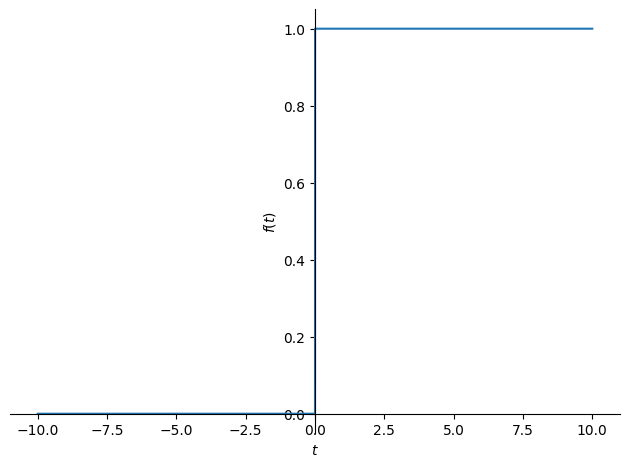

In [79]:
sympy.plot(sympy.Heaviside(t));


In [ ]:
#https://www.mazusoft.com.br/mega/tabela-cor.php

In [ ]:
# Vermelha - Dezenas: 01,11,21,31,41,51
# Amarela  - Dezenas: 02,12,22,32,42,52
# Verde    - Dezenas: 03,13,23,33,43,53
# Marrom   - Dezenas: 04,14,24,34,44,54
# Azul     - Dezenas: 05,15,25,35,45,55
# Rosa     - Dezenas: 06,16,26,36,46,56
# Preta    - Dezenas: 07,17,27,37,47,57
# Cinza    - Dezenas: 08,18,28,38,48,58
# Laranja  - Dezenas: 09,19,29,39,49,59
# Branca   - Dezenas: 10,20,30,40,50,60

In [87]:
import re
import mechanize
from bs4 import BeautifulSoup



ModuleNotFoundError: No module named 'mechanize'